In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pmdarima.arima import ndiffs
import pmdarima as pm
from statsmodels.tsa.arima.model import ARIMA

from plotly.offline import init_notebook_mode, iplot

init_notebook_mode(connected=True)
import plotly.graph_objs as go

import os
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")
plt.style.use('ggplot')

C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\compat\pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [1]:
from sklearn import metrics

def scoring(y_true, y_pred):
    r2 = round(metrics.r2_score(y_true, y_pred) * 100, 3)
    mae = round(metrics.mean_absolute_error(y_true, y_pred), 3)
    corr = round(np.corrcoef(y_true, y_pred)[0,1],3)
    mape = round(metrics.mean_absolute_percentage_error(y_true, y_pred) * 100, 3)
    rmse = round(metrics.mean_squared_error(y_true, y_pred, squared=False), 3)
    rrmse = rmse / np.mean(y_true)
    
    df = pd.DataFrame({
        'R2': r2,
        'MAE' : mae,
        'Corr' : corr,
        'RMSE' : rmse,
        'RRMSE' : rrmse
        #'MAPE' : mape
    }, index=[0])
    return df

In [256]:
pv_data = pd.read_csv("pv_20220215.csv")
pv_data

,area,time,familyID,state,pvVoltage,pvCurrent,pvPower,gridVoltage,gridCurrent,gridPower,...,gridCurrentC,gridPowerC,accurgenamount,totalaccurgenamount,powerFactor,powerHz,errorState,outsidetemp,moduletemp,cdate
0,sc_jong,2022-01-01 00:00:00,Group010,N,0.0,0.0,0,230.53,0.40,0,...,0.40,0,0,46034400,0.007,60.0,0,0,0,2022-01-01 00:00:00
1,sc_jong,2022-01-01 00:00:00,Group011,5120,0.0,0.0,0,0.00,0.00,0,...,0.00,0,121800,23327000,0.000,0.0,0,0,0,2022-01-01 00:00:00
2,sc_jong,2022-01-01 00:00:00,Group012,5120,0.0,0.0,0,0.00,0.00,0,...,0.00,0,89700,21520000,0.000,0.0,0,0,0,2022-01-01 00:00:00
3,sc_jong,2022-01-01 00:00:00,Group020,N,0.0,0.0,0,230.31,0.28,0,...,0.31,0,0,14966280,0.028,59.9,0,0,0,2022-01-01 00:00:00
4,sc_jong,2022-01-01 00:00:00,Group021,5120,0.0,0.0,0,0.00,0.00,0,...,0.00,0,74900,14539000,0.000,0.0,0,0,0,2022-01-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244652,sc_jong,2022-02-01 14:30:00,Group010,N,0.0,0.0,0,231.62,48.40,33760,...,48.40,0,0,52088400,0.998,60.0,0,0,0,2022-02-01 14:29:59
244653,sc_jong,2022-02-01 14:30:00,Group011,0,553.7,30.6,16839,230.40,24.30,16586,...,24.30,0,104400,26524000,0.999,59.9,0,0,0,2022-02-01 14:29:59
244654,sc_jong,2022-02-01 14:30:00,Group012,0,545.9,30.3,16517,231.20,23.70,16177,...,23.70,0,92200,24151000,0.999,59.9,0,0,0,2022-02-01 14:29:59
244655,sc_jong,2022-02-01 14:30:00,Group020,N,0.0,0.0,0,231.51,16.15,11231,...,16.12,0,0,16967750,0.998,60.0,0,0,0,2022-02-01 14:29:59


In [257]:
pv_data['familyID'] = pv_data['familyID'].str.replace('-1','')

In [258]:
groups = pv_data.groupby(pv_data.familyID)
groups.first().index[:]

Index(['13', '14', '16', '17', '20', '21', '22', '32', '34', '37', '40', '41',
       '6', 'Group010', 'Group011', 'Group012', 'Group020', 'Group021'],
      dtype='object', name='familyID')

In [259]:
for i in groups.first().index[:]:
    globals()['pv_df_'+str(i)] = groups.get_group(str(i))
    print('pv_df_'+str(i))

pv_df_13
pv_df_14
pv_df_16
pv_df_17
pv_df_20
pv_df_21
pv_df_22
pv_df_32
pv_df_34
pv_df_37
pv_df_40
pv_df_41
pv_df_6
pv_df_Group010
pv_df_Group011
pv_df_Group012
pv_df_Group020
pv_df_Group021


In [271]:
timeSeries = pv_df_14.loc[:,["time","pvPower","familyID"]]
timeSeries.index = pd.to_datetime(timeSeries.time)
ts = timeSeries.drop("time", axis=1)
df_summary_14 = pd.DataFrame()
df_summary_14['pvPower'] = ts.pvPower.resample('1H').sum()
df_summary_14['familyID'] = ts.familyID.values[0]
df_summary_14

,pvPower,familyID
time,,
2022-01-01 07:00:00,507,14
2022-01-01 08:00:00,5053,14
2022-01-01 09:00:00,72953,14
2022-01-01 10:00:00,108871,14
2022-01-01 11:00:00,131350,14
...,...,...
2022-02-01 10:00:00,120762,14
2022-02-01 11:00:00,145207,14
2022-02-01 12:00:00,158333,14


In [272]:
timeSeries = pv_df_17.loc[:,["time","pvPower","familyID"]]
timeSeries.index = pd.to_datetime(timeSeries.time)
ts = timeSeries.drop("time", axis=1)
df_summary_17 = pd.DataFrame()
df_summary_17['pvPower'] = ts.pvPower.resample('1H').sum()
df_summary_17['familyID'] = ts.familyID.values[0]
df_summary_17

,pvPower,familyID
time,,
2022-01-01 07:00:00,516,17
2022-01-01 08:00:00,4316,17
2022-01-01 09:00:00,7219,17
2022-01-01 10:00:00,18366,17
2022-01-01 11:00:00,122464,17
...,...,...
2022-02-01 10:00:00,79520,17
2022-02-01 11:00:00,142962,17
2022-02-01 12:00:00,156951,17


In [273]:
timeSeries = pv_df_22.loc[:,["time","pvPower","familyID"]]
timeSeries.index = pd.to_datetime(timeSeries.time)
ts = timeSeries.drop("time", axis=1)
df_summary_22 = pd.DataFrame()
df_summary_22['pvPower'] = ts.pvPower.resample('1H').sum()
df_summary_22['familyID'] = ts.familyID.values[0]
df_summary_22

,pvPower,familyID
time,,
2022-01-01 07:00:00,564,22
2022-01-01 08:00:00,17654,22
2022-01-01 09:00:00,46180,22
2022-01-01 10:00:00,56721,22
2022-01-01 11:00:00,73920,22
...,...,...
2022-02-01 10:00:00,77465,22
2022-02-01 11:00:00,86707,22
2022-02-01 12:00:00,95025,22


In [274]:
timeSeries = pv_df_32.loc[:,["time","pvPower","familyID"]]
timeSeries.index = pd.to_datetime(timeSeries.time)
ts = timeSeries.drop("time", axis=1)
df_summary_32 = pd.DataFrame()
df_summary_32['pvPower'] = ts.pvPower.resample('1H').sum()
df_summary_32['familyID'] = ts.familyID.values[0]
df_summary_32

,pvPower,familyID
time,,
2022-01-01 07:00:00,32,32
2022-01-01 08:00:00,2272,32
2022-01-01 09:00:00,5916,32
2022-01-01 10:00:00,8055,32
2022-01-01 11:00:00,9236,32
...,...,...
2022-02-01 10:00:00,6117,32
2022-02-01 11:00:00,9183,32
2022-02-01 12:00:00,10121,32


In [275]:
timeSeries = pv_df_34.loc[:,["time","pvPower","familyID"]]
timeSeries.index = pd.to_datetime(timeSeries.time)
ts = timeSeries.drop("time", axis=1)
df_summary_34 = pd.DataFrame()
df_summary_34['pvPower'] = ts.pvPower.resample('1H').sum()
df_summary_34['familyID'] = ts.familyID.values[0]
df_summary_34

,pvPower,familyID
time,,
2022-01-01 07:00:00,34,34
2022-01-01 08:00:00,780,34
2022-01-01 09:00:00,3847,34
2022-01-01 10:00:00,5504,34
2022-01-01 11:00:00,6566,34
...,...,...
2022-02-01 10:00:00,4596,34
2022-02-01 11:00:00,7008,34
2022-02-01 12:00:00,7417,34


In [276]:
timeSeries = pv_df_37.loc[:,["time","pvPower","familyID"]]
timeSeries.index = pd.to_datetime(timeSeries.time)
ts = timeSeries.drop("time", axis=1)
df_summary_37 = pd.DataFrame()
df_summary_37['pvPower'] = ts.pvPower.resample('1H').sum()
df_summary_37['familyID'] = ts.familyID.values[0]
df_summary_37

,pvPower,familyID
time,,
2022-01-01 07:00:00,60,37
2022-01-01 08:00:00,2596,37
2022-01-01 09:00:00,4428,37
2022-01-01 10:00:00,5855,37
2022-01-01 11:00:00,9202,37
...,...,...
2022-02-01 10:00:00,7943,37
2022-02-01 11:00:00,9503,37
2022-02-01 12:00:00,10186,37


In [277]:
timeSeries = pv_df_6.loc[:,["time","pvPower","familyID"]]
timeSeries.index = pd.to_datetime(timeSeries.time)
ts = timeSeries.drop("time", axis=1)
df_summary_6 = pd.DataFrame()
df_summary_6['pvPower'] = ts.pvPower.resample('1H').sum()
df_summary_6['familyID'] = ts.familyID.values[0]
df_summary_6

,pvPower,familyID
time,,
2022-01-01 07:00:00,520,6
2022-01-01 08:00:00,6723,6
2022-01-01 09:00:00,24206,6
2022-01-01 10:00:00,55604,6
2022-01-01 11:00:00,103960,6
...,...,...
2022-02-01 10:00:00,107906,6
2022-02-01 11:00:00,124828,6
2022-02-01 12:00:00,121332,6


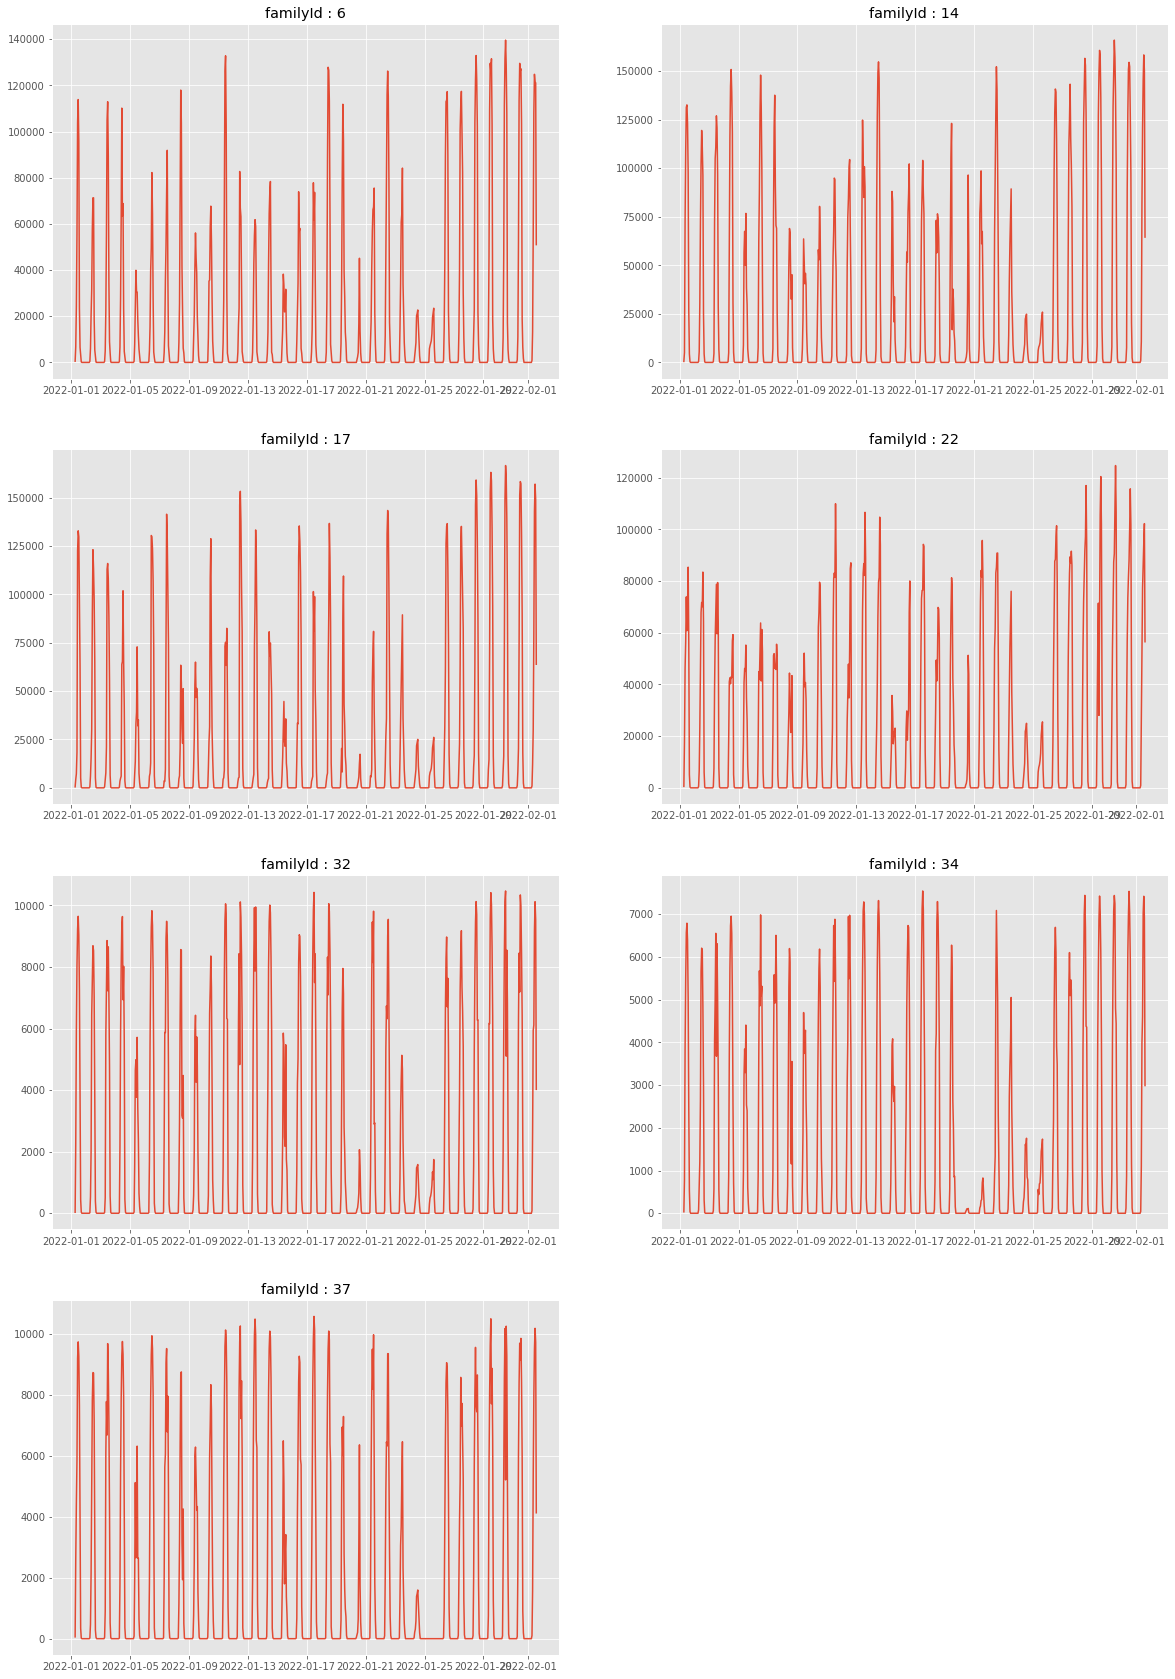

In [251]:
plt.figure(figsize=(20,30))
plt.subplot(4,2,1)
plt.plot(df_summary_6.index, df_summary_6["pvPower"], linestyle="-")
plt.title('familyId : 6')
plt.subplot(4,2,2)
plt.plot(df_summary_14.index, df_summary_14["pvPower"], linestyle="-")
plt.title('familyId : 14')
plt.subplot(4,2,3)
plt.plot(df_summary_17.index, df_summary_17["pvPower"], linestyle="-")
plt.title('familyId : 17')
plt.subplot(4,2,4)
plt.plot(df_summary_22.index, df_summary_22["pvPower"], linestyle="-")
plt.title('familyId : 22')
plt.subplot(4,2,5)
plt.plot(df_summary_32.index, df_summary_32["pvPower"], linestyle="-")
plt.title('familyId : 32')
plt.subplot(4,2,6)
plt.plot(df_summary_34.index, df_summary_34["pvPower"], linestyle="-")
plt.title('familyId : 34')
plt.subplot(4,2,7)
plt.plot(df_summary_37.index, df_summary_37["pvPower"], linestyle="-")
plt.title('familyId : 37')
plt.show();

In [207]:
def set_sarimax_model(data, weather):
    list = []
    for i in range(1,len(weather.columns)):
        if(weather.isnull().sum()[i] == 758):
            list.append(weather.columns[i])
            
    weather.drop(list, axis=1,inplace=True)
    weather.drop(['지점','지점명'], axis=1,inplace=True)
    weather.rename(columns={'기온(°C)':'Temperature','강수량(mm)':'precipitation','습도(%)':'humidity','일조(hr)':'sunshine','지면온도(°C)':'ground_temp'}, inplace=True)
    weather.rename(columns={'일시':'time'}, inplace=True)
    weather.index = pd.to_datetime(weather.time)
    weather.drop(['time'], axis=1, inplace=True)
    
    #기상청 데이터 병합
    df_sum = pd.merge(data, weather, left_index= True, right_index=True, how='left');
    df_sum.fillna(0);
    
    #상관관계 히트맵
    heatmap_data = df_sum[["pvPower","humidity","sunshine","ground_temp"]];
    heatmap_data.fillna(0);
    
    colormap = plt.cm.PuBu 
    plt.figure(figsize=(10, 8)) 
    plt.title("Correlation of Features", y = 1.05, size = 15) 
    sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1, vmax = 1.0, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})
    
    #다음 주기 예측 열 추가
    steps = -24
    dataset_for_prediction = heatmap_data.copy()
    dataset_for_prediction['Actual'] = dataset_for_prediction['pvPower'].shift(steps)
    dataset_for_prediction.fillna(0, inplace=True)
    
    #Scaling
    from sklearn.preprocessing import MinMaxScaler
    sc_in = MinMaxScaler(feature_range=(0,1))
    scaled_input = sc_in.fit_transform(dataset_for_prediction[['pvPower','humidity','sunshine','ground_temp']])
    scaled_input = pd.DataFrame(scaled_input)
    X = scaled_input
    sc_out = MinMaxScaler(feature_range=(0,1))
    scaler_output = sc_out.fit_transform(dataset_for_prediction[['Actual']])
    scaler_output = pd.DataFrame(scaler_output)
    y = scaler_output
    X.rename(columns={0:'pvPower',1:'humidity',2:'sunshine',3:'ground_temp'},inplace=True)
    y.rename(columns={0:'pvPower Next Day'}, inplace=True)
    y.index = dataset_for_prediction.index
    train_size = int(len(df_sum) * 0.7)
    test_size = int(len(df_sum)) - train_size
    train_X, train_y = X[:train_size].dropna(), y[:train_size].dropna()
    test_X, test_y = X[train_size:].dropna(), y[train_size:].dropna()
    
    #AIC
    from pmdarima.arima import auto_arima
    step_wise = auto_arima(train_y,
                          exogenous = train_X,
                          start_p=1,
                          start_q=1,
                          max_p=7,
                          max_q=7, D=1, 
                          start_P=1,
                          start_Q=1,
                           m=24,
                          trace=True, error_action='ignore',
                           seasonal=True,
                          suppress_warnings=True,
                          stepwise=True)
    print(step_wise.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,1,1)[24] intercept   : AIC=inf, Time=18.50 sec
 ARIMA(0,0,0)(0,1,0)[24] intercept   : AIC=-635.643, Time=0.58 sec
 ARIMA(1,0,0)(1,1,0)[24] intercept   : AIC=-1071.233, Time=15.65 sec
 ARIMA(0,0,1)(0,1,1)[24] intercept   : AIC=inf, Time=15.15 sec
 ARIMA(0,0,0)(0,1,0)[24]             : AIC=-637.536, Time=1.13 sec
 ARIMA(1,0,0)(0,1,0)[24] intercept   : AIC=-1062.517, Time=2.63 sec
 ARIMA(1,0,0)(2,1,0)[24] intercept   : AIC=-1115.678, Time=70.58 sec
 ARIMA(1,0,0)(2,1,1)[24] intercept   : AIC=inf, Time=74.24 sec
 ARIMA(1,0,0)(1,1,1)[24] intercept   : AIC=inf, Time=15.54 sec
 ARIMA(0,0,0)(2,1,0)[24] intercept   : AIC=-708.549, Time=46.80 sec
 ARIMA(2,0,0)(2,1,0)[24] intercept   : AIC=-1125.382, Time=77.56 sec
 ARIMA(2,0,0)(1,1,0)[24] intercept   : AIC=-1088.435, Time=14.84 sec
 ARIMA(2,0,0)(2,1,1)[24] intercept   : AIC=inf, Time=82.94 sec
 ARIMA(2,0,0)(1,1,1)[24] intercept   : AIC=inf, Time=17.68 sec
 ARIMA(3,0,0)(2,1,0)[24] intercep

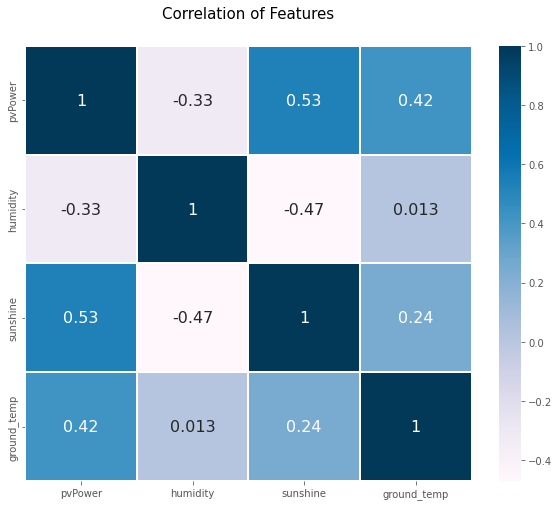

In [208]:
weather = pd.read_csv("weather.csv", encoding='cp949')
set_sarimax_model(df_summary_6, weather)

In [221]:
def prediction_test(data, weather, order, seasonal_order):
    weather.isnull().sum()[:];
    list = []
    for i in range(1,len(weather.columns)):
        if(weather.isnull().sum()[i] == 758):
            list.append(weather.columns[i])
            
    weather.drop(list, axis=1,inplace=True)
    weather.drop(['지점','지점명'], axis=1,inplace=True)
    weather.rename(columns={'기온(°C)':'Temperature','강수량(mm)':'precipitation','습도(%)':'humidity','일조(hr)':'sunshine','지면온도(°C)':'ground_temp'}, inplace=True)
    weather.rename(columns={'일시':'time'}, inplace=True)
    weather.index = pd.to_datetime(weather.time)
    weather.drop(['time'], axis=1, inplace=True)
    
    #기상청 데이터 병합
    df_sum = pd.merge(data, weather, left_index= True, right_index=True, how='left');
    df_sum.fillna(0);
    
    #상관관계 히트맵
    heatmap_data = df_sum[["pvPower","humidity","sunshine","ground_temp"]];
    heatmap_data.fillna(0);
    
     
    #다음 주기 예측 열 추가
    steps = -24
    dataset_for_prediction = heatmap_data.copy()
    dataset_for_prediction['Actual'] = dataset_for_prediction['pvPower'].shift(steps)
    dataset_for_prediction.fillna(0, inplace=True)
    
    #Scaling
    from sklearn.preprocessing import MinMaxScaler
    sc_in = MinMaxScaler(feature_range=(0,1))
    scaled_input = sc_in.fit_transform(dataset_for_prediction[['pvPower','humidity','sunshine','ground_temp']])
    scaled_input = pd.DataFrame(scaled_input)
    X = scaled_input
    sc_out = MinMaxScaler(feature_range=(0,1))
    scaler_output = sc_out.fit_transform(dataset_for_prediction[['Actual']])
    scaler_output = pd.DataFrame(scaler_output)
    y = scaler_output
    X.rename(columns={0:'pvPower',1:'humidity',2:'sunshine',3:'ground_temp'},inplace=True)
    y.rename(columns={0:'pvPower Next Day'}, inplace=True)
    y.index = dataset_for_prediction.index
    train_size = int(len(df_sum) * 0.7)
    test_size = int(len(df_sum)) - train_size
    train_X, train_y = X[:train_size].dropna(), y[:train_size].dropna()
    test_X, test_y = X[train_size:].dropna(), y[train_size:].dropna()
    
    from statsmodels.tsa.statespace.sarimax import SARIMAX
    model = SARIMAX(train_y.values.reshape(-1,1), 
                exog=train_X, 
                order=order,
                seasonal_order=seasonal_order,
                enforce_invertibility=False, enforce_stationarity=False)
    #model fitting
    results = model.fit(trend='nc') #nc : 상수항 제거
    
    predictions = results.predict(start = train_size, end= train_size + test_size + (steps)-1 + 24, exog=test_X)
    act = pd.DataFrame(scaler_output.iloc[train_size:,0])
    act.index = test_X.index
    predictions=pd.DataFrame(predictions)
    predictions.reset_index(drop=True, inplace=True)
    predictions.index=test_X.index
    predictions['Actual'] = act['pvPower Next Day']
    predictions.rename(columns={'predicted_mean':'Pred'}, inplace=True)
    
    #plotting graph
    predictions['Actual'].plot(figsize=(20,8), legend=True, color='blue')
    predictions['Pred'].plot(legend=True, color='red', figsize=(20,8))
   
    #RRMSE 검증
    print(scoring(predictions['Actual'], predictions['Pred']))
    
    #inverse transformation
    lstm_predictions = sc_out.inverse_transform(predictions)
    return lstm_predictions

In [282]:
def prediction(data, weather, order, seasonal_order):
    weather.isnull().sum()[:];
    list = []
    for i in range(1,len(weather.columns)):
        if(weather.isnull().sum()[i] == 758):
            list.append(weather.columns[i])
            
    weather.drop(list, axis=1,inplace=True)
    weather.drop(['지점','지점명'], axis=1,inplace=True)
    weather.rename(columns={'기온(°C)':'Temperature','강수량(mm)':'precipitation','습도(%)':'humidity','일조(hr)':'sunshine','지면온도(°C)':'ground_temp'}, inplace=True)
    weather.rename(columns={'일시':'time'}, inplace=True)
    weather.index = pd.to_datetime(weather.time)
    weather.drop(['time'], axis=1, inplace=True)
    
    #기상청 데이터 병합
    df_sum = pd.merge(data, weather, left_index= True, right_index=True, how='left');
    familyID = data.familyID[0]
    df_sum.fillna(0);
    
    #상관관계 히트맵
    heatmap_data = df_sum[["pvPower","humidity","sunshine","ground_temp"]];
    heatmap_data.fillna(0);
    
     
    #다음 주기 예측 열 추가
    steps = -24
    dataset_for_prediction = heatmap_data.copy()
    dataset_for_prediction['Actual'] = dataset_for_prediction['pvPower'].shift(steps)
    dataset_for_prediction.fillna(0, inplace=True)
    
    #Scaling
    from sklearn.preprocessing import MinMaxScaler
    sc_in = MinMaxScaler(feature_range=(0,1))
    scaled_input = sc_in.fit_transform(dataset_for_prediction[['pvPower','humidity','sunshine','ground_temp']])
    scaled_input = pd.DataFrame(scaled_input)
    X = scaled_input
    sc_out = MinMaxScaler(feature_range=(0,1))
    scaler_output = sc_out.fit_transform(dataset_for_prediction[['Actual']])
    scaler_output = pd.DataFrame(scaler_output)
    y = scaler_output
    X.rename(columns={0:'pvPower',1:'humidity',2:'sunshine',3:'ground_temp'},inplace=True)
    y.rename(columns={0:'pvPower Next Day'}, inplace=True)
    y.index = dataset_for_prediction.index
    train_size = int(len(df_sum) * 0.7)
    test_size = int(len(df_sum)) - train_size
    train_X, train_y = X[:train_size].dropna(), y[:train_size].dropna()
    test_X, test_y = X[train_size:].dropna(), y[train_size:].dropna()
    
    from statsmodels.tsa.statespace.sarimax import SARIMAX
    model = SARIMAX(y.values.reshape(-1,1), 
                exog=X, 
                order=order,
                seasonal_order=seasonal_order,
                enforce_invertibility=False, enforce_stationarity=False)
    #model fitting
    results = model.fit(trend='nc') #nc : 상수항 제거
    
    predictions = results.predict(start = 0, end= len(y) + (steps)-1+24, exog=X)
    act = pd.DataFrame(scaler_output.iloc[0:,0])
    act.index = X.index
    predictions=pd.DataFrame(predictions)
    predictions.reset_index(drop=True, inplace=True)
    predictions.index=X.index
    predictions['pvPower'] = X['pvPower']
    predictions['Actual'] = act['pvPower Next Day']
    predictions.rename(columns={'predicted_mean':'Pred'}, inplace=True)
    
    #plotting graph
    predictions['Actual'].plot(figsize=(20,8), legend=True, color='blue')
    predictions['Pred'].plot(legend=True, color='red', figsize=(20,8))
   
    #RRMSE 검증
    print(scoring(predictions['Actual'], predictions['Pred']))
    
    #inverse transformation
    lstm_predictions = sc_out.inverse_transform(predictions)
    
    df = pd.DataFrame(lstm_predictions)
    df.index = dataset_for_prediction.index
    df.rename(columns={0:'prediction',1:'pvPower'}, inplace=True)
    df.drop(2,axis=1,inplace=True)
    df['familyID'] = familyID
    return df

       R2    MAE   Corr   RMSE    RRMSE
0  88.703  0.037  0.943  0.078  0.67254


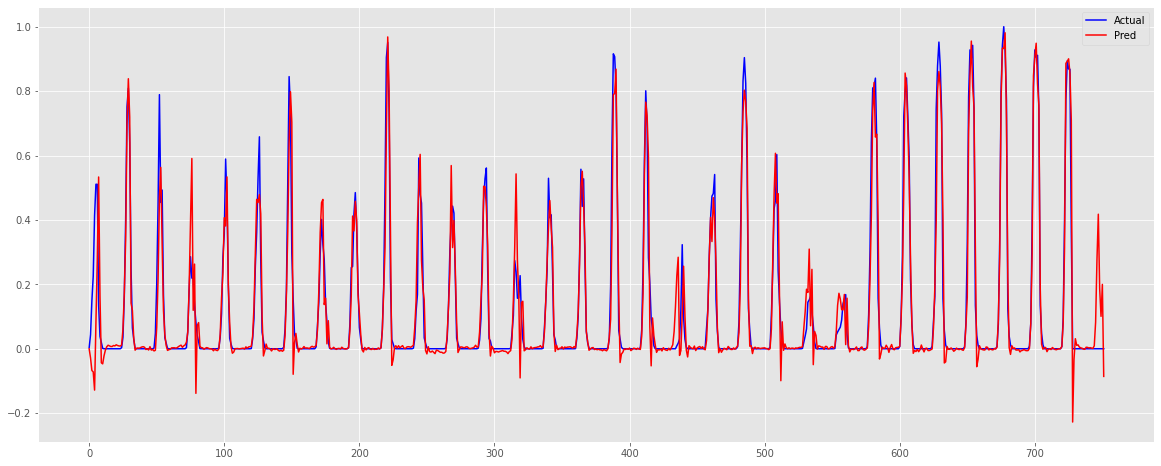

In [285]:
weather = pd.read_csv("weather.csv", encoding='cp949')
lstm_predictions_6 = prediction(df_summary_6, weather, (3,0,0), (2,1,0,24))

In [284]:
lstm_predictions

,prediction,pvPower,familyID
time,,,
2022-01-01 07:00:00,-70.813329,520.0,6
2022-01-01 08:00:00,-3980.203767,6723.0,6
2022-01-01 09:00:00,-9419.530573,24206.0,6
2022-01-01 10:00:00,-10031.190917,55604.0,6
2022-01-01 11:00:00,-17931.292960,103960.0,6
...,...,...,...
2022-02-01 10:00:00,58332.029892,107906.0,6
2022-02-01 11:00:00,26048.028837,124828.0,6
2022-02-01 12:00:00,14051.761390,121332.0,6


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,1,1)[24] intercept   : AIC=inf, Time=18.57 sec
 ARIMA(0,0,0)(0,1,0)[24] intercept   : AIC=-635.643, Time=0.53 sec
 ARIMA(1,0,0)(1,1,0)[24] intercept   : AIC=-1071.233, Time=15.97 sec
 ARIMA(0,0,1)(0,1,1)[24] intercept   : AIC=inf, Time=15.20 sec
 ARIMA(0,0,0)(0,1,0)[24]             : AIC=-637.536, Time=1.11 sec
 ARIMA(1,0,0)(0,1,0)[24] intercept   : AIC=-1062.517, Time=2.59 sec
 ARIMA(1,0,0)(2,1,0)[24] intercept   : AIC=-1115.678, Time=70.63 sec
 ARIMA(1,0,0)(2,1,1)[24] intercept   : AIC=inf, Time=73.62 sec
 ARIMA(1,0,0)(1,1,1)[24] intercept   : AIC=inf, Time=15.54 sec
 ARIMA(0,0,0)(2,1,0)[24] intercept   : AIC=-708.549, Time=46.09 sec
 ARIMA(2,0,0)(2,1,0)[24] intercept   : AIC=-1125.382, Time=73.75 sec
 ARIMA(2,0,0)(1,1,0)[24] intercept   : AIC=-1088.435, Time=14.69 sec
 ARIMA(2,0,0)(2,1,1)[24] intercept   : AIC=inf, Time=82.41 sec
 ARIMA(2,0,0)(1,1,1)[24] intercept   : AIC=inf, Time=17.48 sec
 ARIMA(3,0,0)(2,1,0)[24] intercep

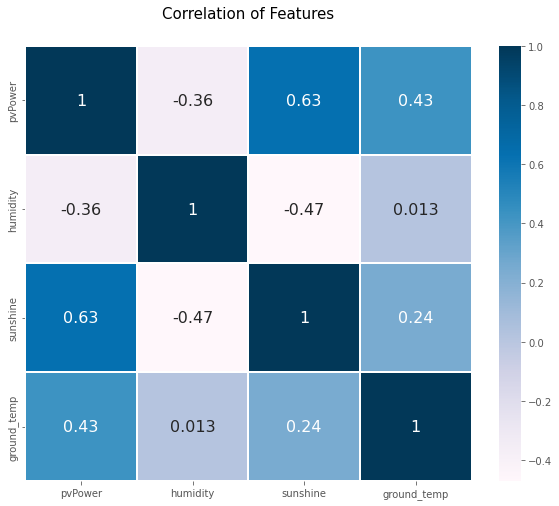

In [223]:
weather = pd.read_csv("weather.csv", encoding='cp949')
set_sarimax_model(df_summary_14, weather)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,1,1)[24] intercept   : AIC=inf, Time=18.51 sec
 ARIMA(0,0,0)(0,1,0)[24] intercept   : AIC=-635.643, Time=0.55 sec
 ARIMA(1,0,0)(1,1,0)[24] intercept   : AIC=-1071.233, Time=16.10 sec
 ARIMA(0,0,1)(0,1,1)[24] intercept   : AIC=inf, Time=15.54 sec
 ARIMA(0,0,0)(0,1,0)[24]             : AIC=-637.536, Time=1.08 sec
 ARIMA(1,0,0)(0,1,0)[24] intercept   : AIC=-1062.517, Time=2.73 sec
 ARIMA(1,0,0)(2,1,0)[24] intercept   : AIC=-1115.678, Time=70.61 sec
 ARIMA(1,0,0)(2,1,1)[24] intercept   : AIC=inf, Time=73.49 sec
 ARIMA(1,0,0)(1,1,1)[24] intercept   : AIC=inf, Time=15.38 sec
 ARIMA(0,0,0)(2,1,0)[24] intercept   : AIC=-708.549, Time=46.18 sec
 ARIMA(2,0,0)(2,1,0)[24] intercept   : AIC=-1125.382, Time=73.63 sec
 ARIMA(2,0,0)(1,1,0)[24] intercept   : AIC=-1088.435, Time=14.64 sec
 ARIMA(2,0,0)(2,1,1)[24] intercept   : AIC=inf, Time=81.74 sec
 ARIMA(2,0,0)(1,1,1)[24] intercept   : AIC=inf, Time=17.56 sec
 ARIMA(3,0,0)(2,1,0)[24] intercep

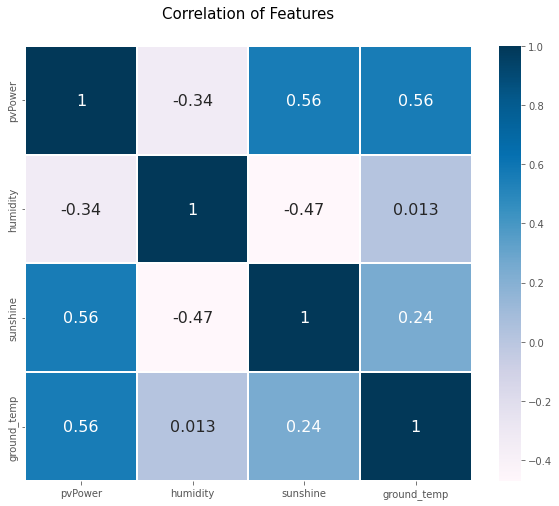

In [224]:
weather = pd.read_csv("weather.csv", encoding='cp949')
set_sarimax_model(df_summary_17, weather)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,1,1)[24] intercept   : AIC=inf, Time=18.67 sec
 ARIMA(0,0,0)(0,1,0)[24] intercept   : AIC=-635.643, Time=0.55 sec
 ARIMA(1,0,0)(1,1,0)[24] intercept   : AIC=-1071.233, Time=16.16 sec
 ARIMA(0,0,1)(0,1,1)[24] intercept   : AIC=inf, Time=15.54 sec
 ARIMA(0,0,0)(0,1,0)[24]             : AIC=-637.536, Time=1.14 sec
 ARIMA(1,0,0)(0,1,0)[24] intercept   : AIC=-1062.517, Time=2.57 sec
 ARIMA(1,0,0)(2,1,0)[24] intercept   : AIC=-1115.678, Time=70.64 sec
 ARIMA(1,0,0)(2,1,1)[24] intercept   : AIC=inf, Time=73.56 sec
 ARIMA(1,0,0)(1,1,1)[24] intercept   : AIC=inf, Time=15.61 sec
 ARIMA(0,0,0)(2,1,0)[24] intercept   : AIC=-708.549, Time=46.09 sec
 ARIMA(2,0,0)(2,1,0)[24] intercept   : AIC=-1125.382, Time=73.81 sec
 ARIMA(2,0,0)(1,1,0)[24] intercept   : AIC=-1088.435, Time=14.64 sec
 ARIMA(2,0,0)(2,1,1)[24] intercept   : AIC=inf, Time=81.68 sec
 ARIMA(2,0,0)(1,1,1)[24] intercept   : AIC=inf, Time=17.50 sec
 ARIMA(3,0,0)(2,1,0)[24] intercep

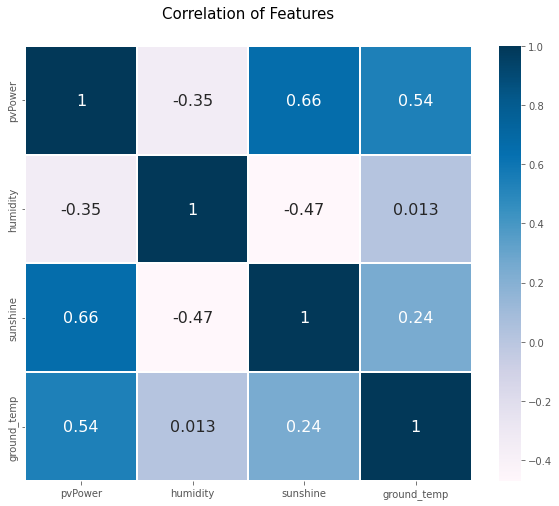

In [225]:
weather = pd.read_csv("weather.csv", encoding='cp949')
set_sarimax_model(df_summary_22, weather)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,1,1)[24] intercept   : AIC=inf, Time=18.78 sec
 ARIMA(0,0,0)(0,1,0)[24] intercept   : AIC=-635.643, Time=0.55 sec
 ARIMA(1,0,0)(1,1,0)[24] intercept   : AIC=-1071.233, Time=16.03 sec
 ARIMA(0,0,1)(0,1,1)[24] intercept   : AIC=inf, Time=15.22 sec
 ARIMA(0,0,0)(0,1,0)[24]             : AIC=-637.536, Time=1.08 sec
 ARIMA(1,0,0)(0,1,0)[24] intercept   : AIC=-1062.517, Time=2.65 sec
 ARIMA(1,0,0)(2,1,0)[24] intercept   : AIC=-1115.678, Time=70.74 sec
 ARIMA(1,0,0)(2,1,1)[24] intercept   : AIC=inf, Time=73.89 sec
 ARIMA(1,0,0)(1,1,1)[24] intercept   : AIC=inf, Time=15.56 sec
 ARIMA(0,0,0)(2,1,0)[24] intercept   : AIC=-708.549, Time=46.13 sec
 ARIMA(2,0,0)(2,1,0)[24] intercept   : AIC=-1125.382, Time=73.72 sec
 ARIMA(2,0,0)(1,1,0)[24] intercept   : AIC=-1088.435, Time=14.65 sec
 ARIMA(2,0,0)(2,1,1)[24] intercept   : AIC=inf, Time=81.61 sec
 ARIMA(2,0,0)(1,1,1)[24] intercept   : AIC=inf, Time=17.47 sec
 ARIMA(3,0,0)(2,1,0)[24] intercep

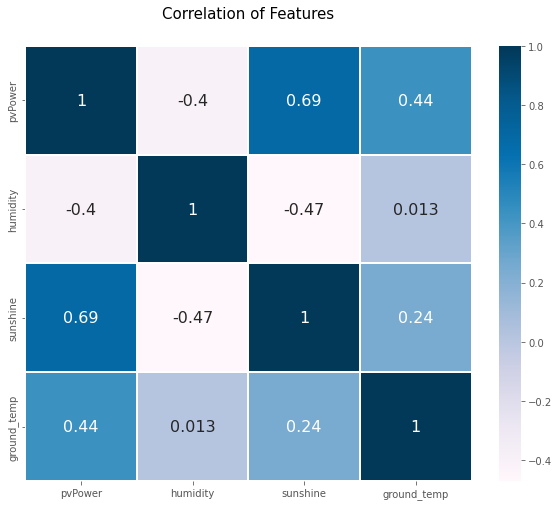

In [226]:
weather = pd.read_csv("weather.csv", encoding='cp949')
set_sarimax_model(df_summary_32, weather)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,1,1)[24] intercept   : AIC=inf, Time=18.67 sec
 ARIMA(0,0,0)(0,1,0)[24] intercept   : AIC=-635.643, Time=0.60 sec
 ARIMA(1,0,0)(1,1,0)[24] intercept   : AIC=-1071.233, Time=16.02 sec
 ARIMA(0,0,1)(0,1,1)[24] intercept   : AIC=inf, Time=15.18 sec
 ARIMA(0,0,0)(0,1,0)[24]             : AIC=-637.536, Time=1.09 sec
 ARIMA(1,0,0)(0,1,0)[24] intercept   : AIC=-1062.517, Time=2.65 sec
 ARIMA(1,0,0)(2,1,0)[24] intercept   : AIC=-1115.678, Time=70.78 sec
 ARIMA(1,0,0)(2,1,1)[24] intercept   : AIC=inf, Time=73.51 sec
 ARIMA(1,0,0)(1,1,1)[24] intercept   : AIC=inf, Time=16.64 sec
 ARIMA(0,0,0)(2,1,0)[24] intercept   : AIC=-708.549, Time=46.35 sec
 ARIMA(2,0,0)(2,1,0)[24] intercept   : AIC=-1125.382, Time=73.66 sec
 ARIMA(2,0,0)(1,1,0)[24] intercept   : AIC=-1088.435, Time=14.52 sec
 ARIMA(2,0,0)(2,1,1)[24] intercept   : AIC=inf, Time=81.80 sec
 ARIMA(2,0,0)(1,1,1)[24] intercept   : AIC=inf, Time=17.49 sec
 ARIMA(3,0,0)(2,1,0)[24] intercep

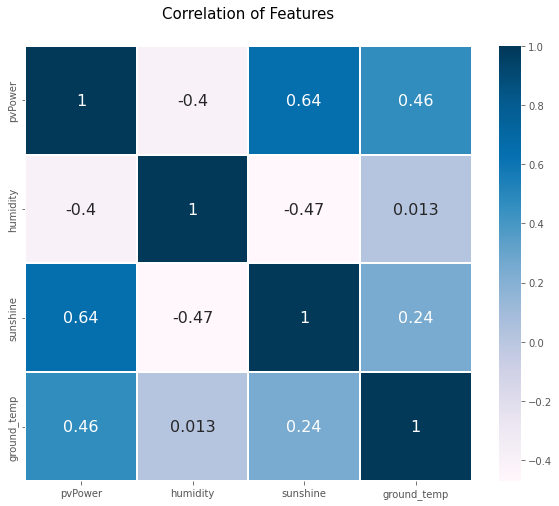

In [227]:
weather = pd.read_csv("weather.csv", encoding='cp949')
set_sarimax_model(df_summary_34, weather)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,1,1)[24] intercept   : AIC=inf, Time=27.42 sec
 ARIMA(0,0,0)(0,1,0)[24] intercept   : AIC=-635.643, Time=0.86 sec
 ARIMA(1,0,0)(1,1,0)[24] intercept   : AIC=-1071.233, Time=22.60 sec
 ARIMA(0,0,1)(0,1,1)[24] intercept   : AIC=inf, Time=21.95 sec
 ARIMA(0,0,0)(0,1,0)[24]             : AIC=-637.536, Time=1.67 sec
 ARIMA(1,0,0)(0,1,0)[24] intercept   : AIC=-1062.517, Time=3.73 sec
 ARIMA(1,0,0)(2,1,0)[24] intercept   : AIC=-1115.678, Time=80.69 sec
 ARIMA(1,0,0)(2,1,1)[24] intercept   : AIC=inf, Time=85.02 sec
 ARIMA(1,0,0)(1,1,1)[24] intercept   : AIC=inf, Time=20.96 sec
 ARIMA(0,0,0)(2,1,0)[24] intercept   : AIC=-708.549, Time=52.37 sec
 ARIMA(2,0,0)(2,1,0)[24] intercept   : AIC=-1125.382, Time=84.62 sec
 ARIMA(2,0,0)(1,1,0)[24] intercept   : AIC=-1088.435, Time=19.90 sec
 ARIMA(2,0,0)(2,1,1)[24] intercept   : AIC=inf, Time=96.70 sec
 ARIMA(2,0,0)(1,1,1)[24] intercept   : AIC=inf, Time=23.65 sec
 ARIMA(3,0,0)(2,1,0)[24] intercep

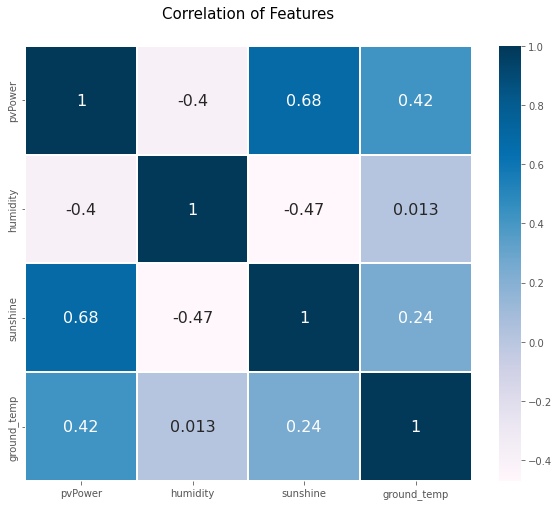

In [228]:
weather = pd.read_csv("weather.csv", encoding='cp949')
set_sarimax_model(df_summary_37, weather)

       R2    MAE   Corr  RMSE     RRMSE
0  87.349  0.042  0.935  0.09  0.649786


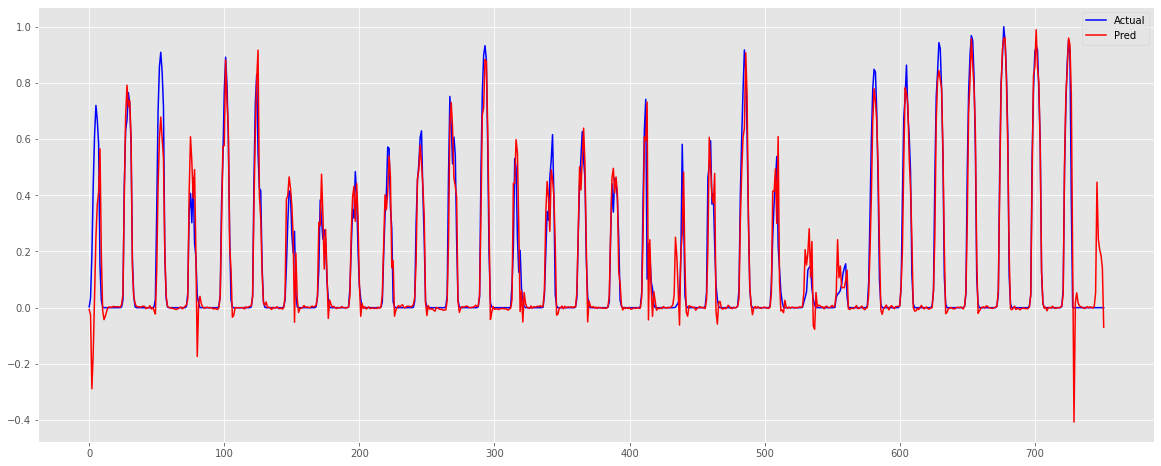

In [286]:
weather = pd.read_csv("weather.csv", encoding='cp949')
lstm_predictions_14 = prediction(df_summary_14, weather, (3,0,0), (2,1,0,24))

      R2   MAE   Corr   RMSE     RRMSE
0  85.63  0.04  0.926  0.089  0.758666


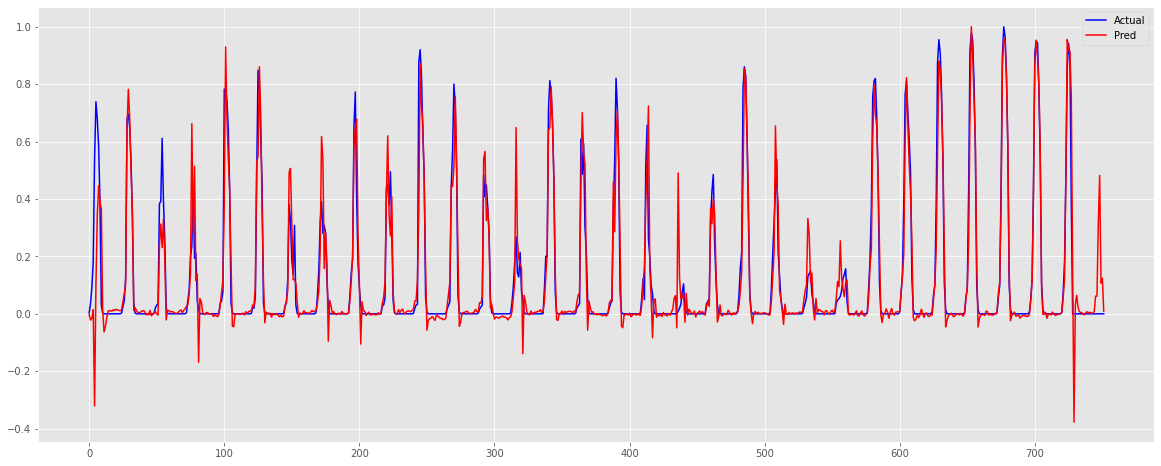

In [287]:
weather = pd.read_csv("weather.csv", encoding='cp949')
lstm_predictions_17 = prediction(df_summary_17, weather, (3,0,0), (2,1,0,24))

       R2    MAE   Corr   RMSE     RRMSE
0  87.637  0.044  0.937  0.084  0.594406


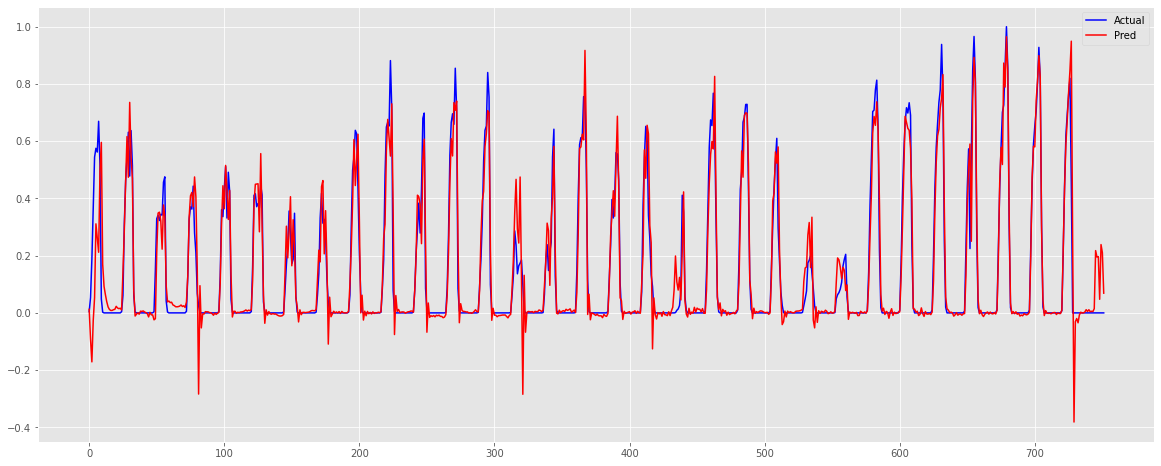

In [288]:
weather = pd.read_csv("weather.csv", encoding='cp949')
lstm_predictions_22 = prediction(df_summary_22, weather, (3,0,0), (2,1,0,24))

       R2    MAE   Corr   RMSE     RRMSE
0  85.244  0.057  0.924  0.115  0.650005


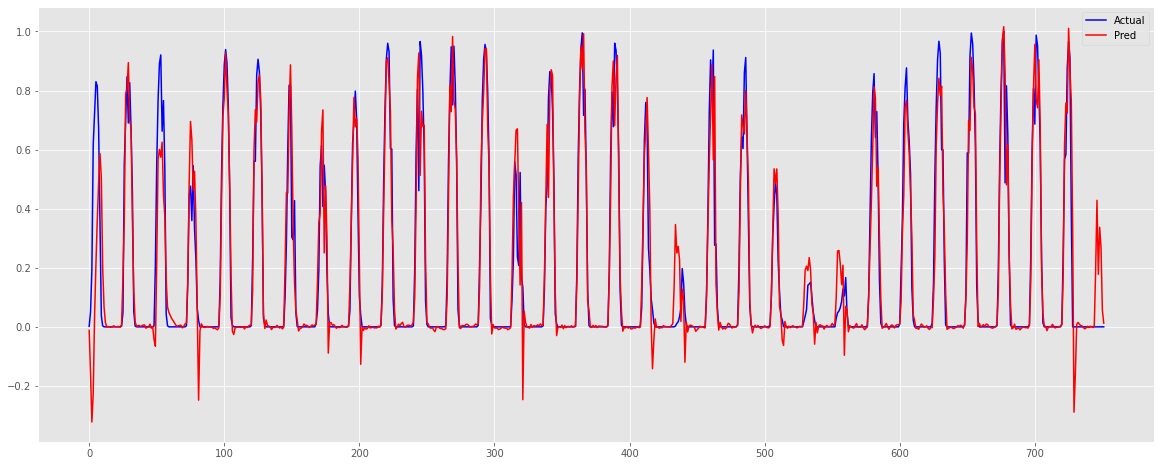

In [289]:
weather = pd.read_csv("weather.csv", encoding='cp949')
lstm_predictions_32 = prediction(df_summary_32, weather, (3,0,0), (2,1,0,24))

       R2    MAE   Corr   RMSE     RRMSE
0  88.475  0.048  0.941  0.099  0.586037


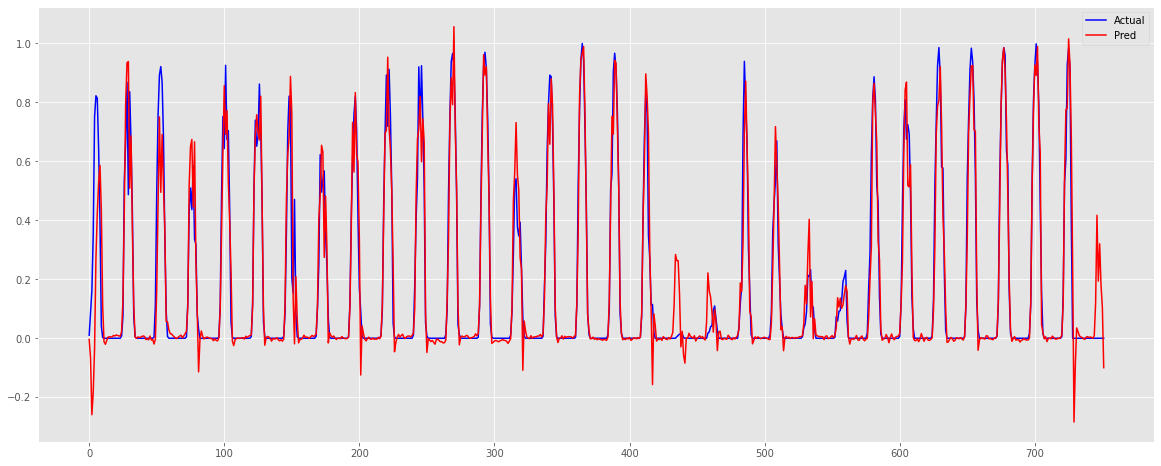

In [290]:
weather = pd.read_csv("weather.csv", encoding='cp949')
lstm_predictions_34 = prediction(df_summary_34, weather, (3,0,0), (2,1,0,24))

     R2    MAE   Corr   RMSE     RRMSE
0  85.9  0.056  0.928  0.112  0.645291


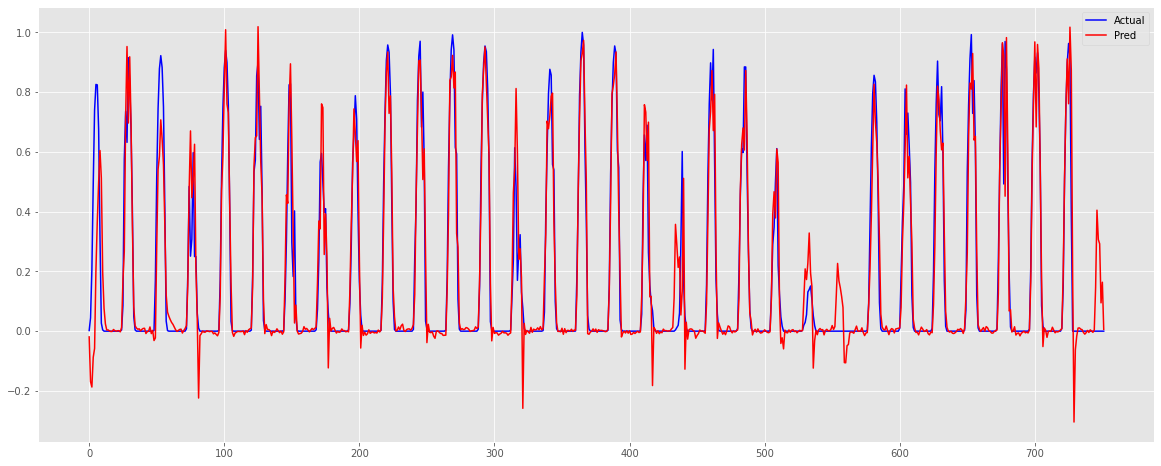

In [291]:
weather = pd.read_csv("weather.csv", encoding='cp949')
lstm_predictions_37 = prediction(df_summary_37, weather, (3,0,0), (2,1,0,24))

       R2    MAE   Corr   RMSE    RRMSE
0  88.703  0.037  0.943  0.078  0.67254


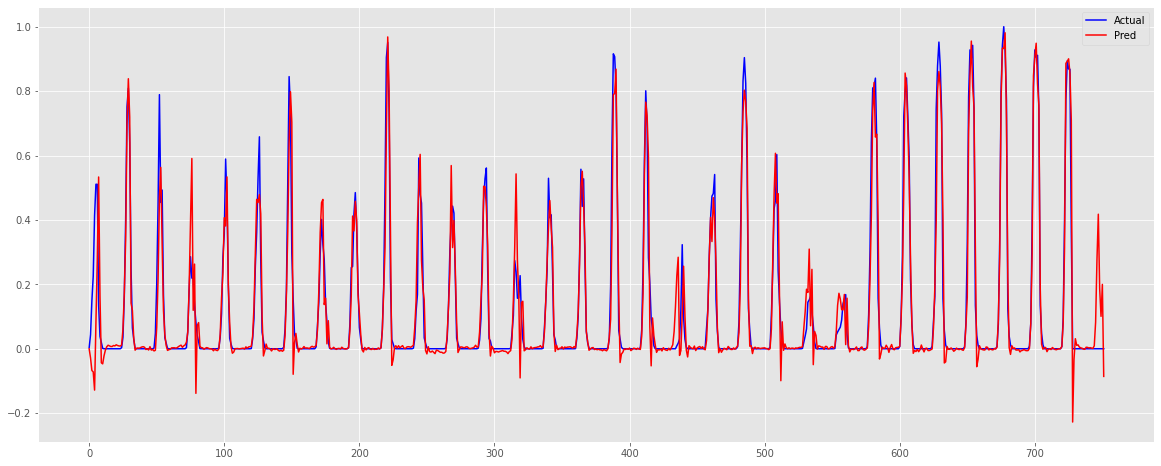

In [292]:
weather = pd.read_csv("weather.csv", encoding='cp949')
lstm_predictions_6 = prediction(df_summary_6, weather, (3,0,0), (2,1,0,24))

In [293]:
lstm_predictions_6['date'] = lstm_predictions_6.index
lstm_predictions_14['date'] = lstm_predictions_14.index
lstm_predictions_17['date'] = lstm_predictions_17.index
lstm_predictions_22['date'] = lstm_predictions_22.index
lstm_predictions_32['date'] = lstm_predictions_32.index
lstm_predictions_34['date'] = lstm_predictions_34.index
lstm_predictions_37['date'] = lstm_predictions_37.index

In [301]:
result = pd.concat([lstm_predictions_6,
                   lstm_predictions_14,
                   lstm_predictions_17,
                   lstm_predictions_22,
                   lstm_predictions_32,
                   lstm_predictions_34,
                   lstm_predictions_37])
result.reset_index(inplace=True)
result.drop(['time'],axis=1,inplace=True)

In [302]:
result

,prediction,pvPower,familyID,date
0,-70.813329,520.0,6,2022-01-01 07:00:00
1,-3980.203767,6723.0,6,2022-01-01 08:00:00
2,-9419.530573,24206.0,6,2022-01-01 09:00:00
3,-10031.190917,55604.0,6,2022-01-01 10:00:00
4,-17931.292960,103960.0,6,2022-01-01 11:00:00
...,...,...,...,...
5259,3245.094187,7943.0,37,2022-02-01 10:00:00
5260,3090.938605,9503.0,37,2022-02-01 11:00:00
5261,1001.923750,10186.0,37,2022-02-01 12:00:00
5262,1732.661914,9728.0,37,2022-02-01 13:00:00


In [303]:
result.to_csv('C:pv_prediction.csv')